# GANgster
A Generative Adversarial Network to create mugshots

## What is a GAN
A Generative Adversarial Network is a model of machine learning used to generate fake data from a dataset. It can be used in various fields, such as creating images of people who don't exist see [thispersondoesnotexist.com](https://thispersondoesnotexist.com/)


### How to build one
There are two main parts in a GAN :

* The discriminator :

The discriminator networks are the most used neural networks in the field of Artificial Intelligence. Those are networks that are trained to recognise some type of data and extract an information out of them. For example, an IA that will classify plants is most likely built with a discriminator network.
    
* The generator :

This is the most important part of the GAN. It will create data from a random noise, and will be trained against the discriminator in order to build more realistic data over time.

The way GANs work (most of the time at least) is the following: The _Generator_ is given an array of noise, and processes this array to spit out an array of imformation that it thinks is a valid representation of true data. The _discriminator_ is then fed this data and tries to figure out whether it is true data or false data. The _discriminator_ may be fed data from the dataset as well as data from the _Generator_. The idea behind is to make both the networks compete against each other to get better and better at generating or recognizing fake data.


### How to train one

### How to use one

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

## 1) Preparing the data
In this first part, we'll generate a dataset we can use to train our networks. It will consist in 1024 tuples, representing a sine function. These data are easy to create as we know a formula to generate an infinite amount of them.

Firstly, we'll set a hardcoded seed to be able to reproduce our experience easily

In [2]:
# Use a fixed seed to run similar experiments
torch.manual_seed(111)

In [3]:
# DataSet of size 1024
train_data_length = 1024

In [4]:
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)

train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

Here we can plot the data we have using matplotlib.

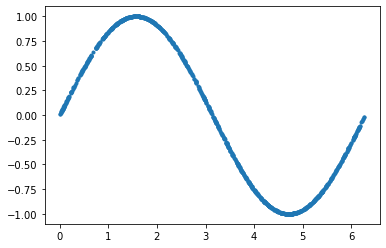

In [5]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

The following bit creates random sample of 32 elements, used to train the discriminator

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

## The discriminator
The follwing class implements the discriminator part of our project. It consists in a sequential neural network.
![DiscriminatorDiagram](Diagrams/SineTest/SineDiscriminator.png)

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [8]:
discriminator = Discriminator()

## 3) The Generator
Now we will implement the central piece of our GAN, the Generator. It is also a sequential Network, but with diffrences in its architecture

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [10]:
generator = Generator()

## 4) Training
lr = Learning Rate (Weight for nerons adaption, the higher, the faster the neurons change)
epochs = number of repreated trainings
Loss Function : The function used to change the weights of the neurons

In [11]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

#### Pytorch Optimizator

In [12]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

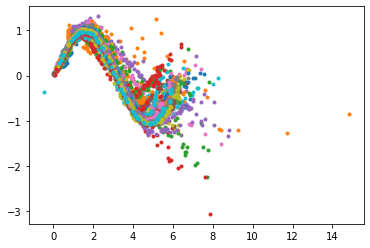

In [13]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            latent_space_samples = torch.randn(100, 2)
            generated_samples = generator(latent_space_samples)
            generated_samples = generated_samples.detach()
            plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

## X) Results
Now we will try to see if the generator has trained correctly by making him generate data, and showing it

In [14]:
latent_space_samples = torch.randn(1000, 2)
generated_samples = generator(latent_space_samples)

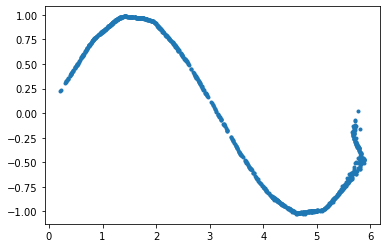

In [15]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")